# MNIST Classifier using KNN

# 1. Frame the problem and look at the big picture.

**Problem**: Handwritten digit classification on MNIST dataset.

**Solution Goal**: Achieve >97% accuracy on test set using basic ML models and possibly deep learning.

**Metric**: Accuracy.

**Approach**: Start with KNN.

**Why**: Practice supervised learning, understand classification workflows, benchmarking skills.

# 2. Setup

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']

## Convert Labels to Integers

In [3]:
y = y.astype(np.uint8)

let's now see what we're working with

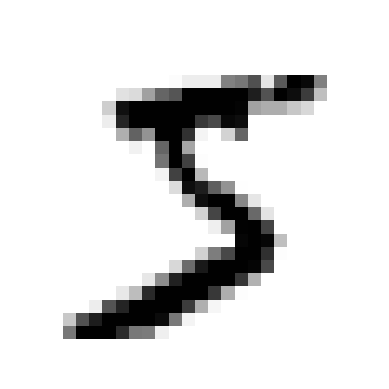

Label: 5


In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

print("Label:", y[0])

## Creating a training/testing set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# For cleaner, prettier plots 
sns.set_style('whitegrid')

# To check dataset size:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (56000, 784), Test set: (14000, 784)


# 3. Training the model

for those type of problems KNN usually works best, I will try it out, but first we should use grid search to find the best hyperparameters

## Finiding best Hyperparameters using Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy: 0.9689107289345159


## Training

In [8]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

Let's make a prediction now

In [10]:
y_pred = best_knn.predict(X_test)

Let's test things out here

In [11]:
best_knn.predict([some_digit])

array([5], dtype=uint8)

# 4. Evaluate the Performance

## Accuracy

Let's start out by finding the **accuracy**

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9707857142857143


wow 97% well before we get too excited, accuracy is generally not preferd preformance measure in classification, because some classes are more frequent than another, there must be a better way to evaluate the performance.

Let's try Confusion Matrix

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[1375    1    0    0    0    1    3    0    0    1]
 [   0 1564    5    1    1    0    1    3    0    0]
 [  11   13 1333    5    2    0    4   26    4    0]
 [   1    2    7 1386    0   12    2    8    6    4]
 [   2   13    1    0 1307    0    5    2    0   35]
 [   5    3    1    7    1 1218   17    2    3    6]
 [   7    3    0    0    1    5 1358    0    1    0]
 [   1   14    3    0    1    0    0 1427    0   13]
 [   7   11    0   18    4   27    3    4 1279   12]
 [   2    7    0    9   11    2    1   12    3 1344]]


the columns represent the predicted values and the rows represent the acutal values. having higher numbers on the main diagonal means we're getting great results, let's make an image representation of the confusion matrix 

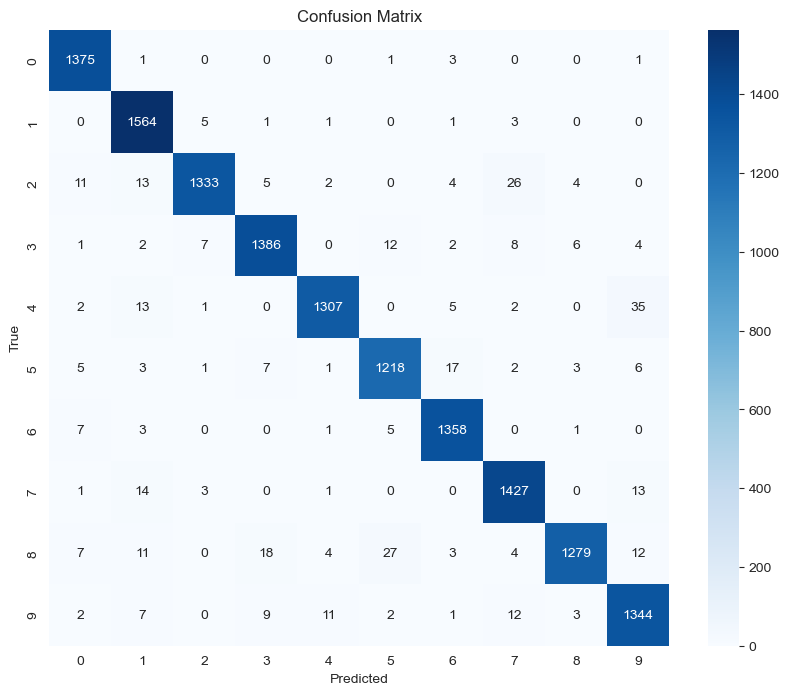

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

nice

## Precision, Recall, F1-Score (Classification Report)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1381
           1       0.96      0.99      0.98      1575
           2       0.99      0.95      0.97      1398
           3       0.97      0.97      0.97      1428
           4       0.98      0.96      0.97      1365
           5       0.96      0.96      0.96      1263
           6       0.97      0.99      0.98      1375
           7       0.96      0.98      0.97      1459
           8       0.99      0.94      0.96      1365
           9       0.95      0.97      0.96      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

